### Getting Started with Data from the Quantopian Store

The purpose of this notebook is to introduce you to the mechanics of working with data in the Quantopian Store, especially the Blaze library. Let's dig in.


We can start off by trying to import the full, paid version of a data set -- in this case, estimate revisions data from Estimize. A user that has purchased access to this data set from Estimize can successfully run this import. Users who haven't purchased access to this data set will receive an error.

In [1]:
from quantopian.interactive.data.estimize import revisions

But worry not, if you haven't purchased the data yet. There are generous free samples for every data set. You can explore and understand the data prior to purchasing a subscription for the full data.

The free samples typically cover at least 3 years of historic data. The free samples typically *don't* cover a trailing window of 1 or 2 years prior to the current day. Estimize's revision data, which we're examining here, provides access in the free sample (`revisions_free`) for up to one year from today.

In [2]:
from quantopian.interactive.data.estimize import revisions_free

### Key fields common to most Store data sets

Let's take a look at the estimate revisions data from Estimize. By simply `running revisions_free` in our notebook, we'll see the resulting Blaze expression.

Blaze is a library for accessing, manipulating and filtering large data sets. We use it here for accessing the data from the Quantopian Store because these data sets can be very large. Blaze allows us to shift the processing burden over to the server side.

Looking at the object, there are many fields unique to Estimize. I want to cover three that you'll see in every data set from the Quantopian Store:

- `sid`: we've done symbol mapping for all cross-sectional data sets for you. You don't have to worry about it this drudgery. We've got you covered
- `timestamp`: the `timestamp` represents the datetime upon which the record entered the Quantopian system and is available for use by you. For records added to the dataset after the introduction of the overall dataset, we have an exact record for this time. For records from the initial load of historical data, we do our best to approximate this date. This field is especially important for preventing look-ahead bias.
- `asof_date`: the `asof_date` represents the time period to which the record applies. Often times this is simply the datetime at which the data was recorded. Other times it is the timeframe (such as 3/31 for data applying to the first quarter)

Check it out below:

In [3]:
revisions_free

,count,high,low,mean,metric,source,standard_deviation,asof_date,consensus_eps_estimate,consensus_revenue_estimate,eps,fiscal_quarter,fiscal_year,id,name,release_date,revenue,symbol,wallstreet_eps_estimate,wallstreet_revenue_estimate,timestamp,sid
0,2,0.62,0.48,0.550,eps,wallstreet,0.099,2014-08-05 11:09:21.044000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-08-05 11:29:21.044000,42786
1,2,0.60,0.52,0.560,eps,wallstreet,0.057,2014-07-29 11:16:02.680000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-07-29 11:36:02.680000,42786
2,3,0.60,0.52,0.573,eps,wallstreet,0.046,2014-07-10 11:09:32.248000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-07-10 11:29:32.248000,42786
3,4,0.63,0.52,0.588,eps,wallstreet,0.047,2014-06-17 11:10:33.127000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-06-17 11:30:33.127000,42786
4,4,0.63,0.50,0.583,eps,wallstreet,0.057,2014-05-07 11:28:08.998000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-05-07 11:48:08.998000,42786
5,4,0.60,0.50,0.570,eps,wallstreet,0.048,2014-05-03 11:13:01.558000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-05-03 11:33:01.558000,42786
6,2,1610.70,1556.00,1583.350,revenue,wallstreet,38.678,2014-08-05 11:09:21.148000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-08-05 11:29:21.148000,42786
7,2,1595.80,1511.00,1553.400,revenue,wallstreet,59.962,2014-07-10 11:09:32.389000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-07-10 11:29:32.389000,42786
8,3,1595.80,1511.00,1562.500,revenue,wallstreet,45.234,2014-06-17 11:10:33.327000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-06-17 11:30:33.327000,42786
9,3,1580.70,1511.00,1546.100,revenue,wallstreet,34.852,2014-05-24 11:05:50.596000,None,None,None,3,2015,5275dfaad2500546bf00031d,MRC Global Inc.,2015-11-05 11:00:00,None,MRC,0.036,1078.388,2014-05-24 11:25:50.596000,42786


As you see above, this particular data set has a lot of columns. We can narrow down the columns into a new expression using Blaze:

In [4]:
narrow_revisions = revisions_free[[
    'source',
    'metric',
    'fiscal_quarter',
    'fiscal_year',
    'release_date',
    'eps',
    'sid',
    'asof_date',
    'timestamp',
]]

In [5]:
narrow_revisions

,source,metric,fiscal_quarter,fiscal_year,release_date,eps,sid,asof_date,timestamp
0,wallstreet,eps,3,2015,2015-11-05 11:00:00,None,42786,2014-08-05 11:09:21.044000,2014-08-05 11:29:21.044000
1,wallstreet,eps,3,2015,2015-11-05 11:00:00,None,42786,2014-07-29 11:16:02.680000,2014-07-29 11:36:02.680000
2,wallstreet,eps,3,2015,2015-11-05 11:00:00,None,42786,2014-07-10 11:09:32.248000,2014-07-10 11:29:32.248000
3,wallstreet,eps,3,2015,2015-11-05 11:00:00,None,42786,2014-06-17 11:10:33.127000,2014-06-17 11:30:33.127000
4,wallstreet,eps,3,2015,2015-11-05 11:00:00,None,42786,2014-05-07 11:28:08.998000,2014-05-07 11:48:08.998000
5,wallstreet,eps,3,2015,2015-11-05 11:00:00,None,42786,2014-05-03 11:13:01.558000,2014-05-03 11:33:01.558000
6,wallstreet,revenue,3,2015,2015-11-05 11:00:00,None,42786,2014-08-05 11:09:21.148000,2014-08-05 11:29:21.148000
7,wallstreet,revenue,3,2015,2015-11-05 11:00:00,None,42786,2014-07-10 11:09:32.389000,2014-07-10 11:29:32.389000
8,wallstreet,revenue,3,2015,2015-11-05 11:00:00,None,42786,2014-06-17 11:10:33.327000,2014-06-17 11:30:33.327000
9,wallstreet,revenue,3,2015,2015-11-05 11:00:00,None,42786,2014-05-24 11:05:50.596000,2014-05-24 11:25:50.596000


Just to emphasize, this object is a Blaze expression:

In [6]:
type(narrow_revisions)

<class 'blaze.expr.expressions.Projection'>

Though we've narrowed the number of columns, there's still a lot of rows:

In [7]:
narrow_revisions.count()

856482

We can pare this down further with some simple expressions, like filtering on a particular `sid` like 24 for AAPL and a particular value for `metric`, like 'eps'. Further, we should be sure to sort the data since there's no guarentee that the underlying database is returning a sorted result.

In [8]:
aapl_revisions = narrow_revisions[
    (narrow_revisions.sid == 24) &
    (narrow_revisions.metric == 'eps')
].sort('asof_date')

aapl_revisions

,source,metric,fiscal_quarter,fiscal_year,release_date,eps,sid,asof_date,timestamp
0,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-09-29 16:00:00,2010-09-29 16:20:00
1,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-09-30 16:00:00,2010-09-30 16:20:00
2,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-01 16:00:00,2010-10-01 16:20:00
3,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-01 16:00:00,2010-10-01 16:20:00
4,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-01 16:00:00,2010-10-01 16:20:00
5,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-07 16:00:00,2010-10-07 16:20:00
6,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-14 16:00:00,2010-10-14 16:20:00
7,estimize,eps,1,2011,2011-01-18 06:55:00,0.92,24,2010-12-28 17:00:00,2010-12-28 17:20:00
8,estimize,eps,1,2011,2011-01-18 06:55:00,0.92,24,2010-12-29 17:00:00,2010-12-29 17:20:00
9,estimize,eps,1,2011,2011-01-18 06:55:00,0.92,24,2010-12-29 17:00:00,2010-12-29 17:20:00


Again, Blaze gives us up to row 10. Let's checkout the size of this filtered down set of revisions

In [9]:
aapl_revisions.count()

3887

Great. Now that we've got our data down to a manageable size, we can convert it over to a pandas dataframe for further manipulation. You'll use `odo` to make that conversion:

In [10]:
from odo import odo
import pandas as pd
aapl_df = odo(aapl_revisions, pd.DataFrame)

In [11]:
aapl_df[:20]

,source,metric,fiscal_quarter,fiscal_year,release_date,eps,sid,asof_date,timestamp
0,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-09-29 16:00:00,2010-09-29 16:20:00
1,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-09-30 16:00:00,2010-09-30 16:20:00
2,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-01 16:00:00,2010-10-01 16:20:00
3,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-01 16:00:00,2010-10-01 16:20:00
4,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-01 16:00:00,2010-10-01 16:20:00
5,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-07 16:00:00,2010-10-07 16:20:00
6,estimize,eps,4,2010,2010-10-18 15:55:00,0.66,24,2010-10-14 16:00:00,2010-10-14 16:20:00
7,estimize,eps,1,2011,2011-01-18 06:55:00,0.92,24,2010-12-28 17:00:00,2010-12-28 17:20:00
8,estimize,eps,1,2011,2011-01-18 06:55:00,0.92,24,2010-12-29 17:00:00,2010-12-29 17:20:00
9,estimize,eps,1,2011,2011-01-18 06:55:00,0.92,24,2010-12-29 17:00:00,2010-12-29 17:20:00


Yup, we've got a dataframe:

In [12]:
type(aapl_df)

<class 'pandas.core.frame.DataFrame'>

### Grouped Reductions: split-apply-combine in Blaze

Blaze provides other functions to manipulate data as you access it. In this next example, we'll use a data set  from Accern to demonstrate grouping. Accern provides a daily metric measuring the sentiment of news stories about companies.

For this example, we'll roll up the individual sentiment scortes into a single, daily, average sentiment score for each day in the data set.

So let's start with the free sample version of the Accern AlphaOne dataset:

In [13]:
from quantopian.interactive.data.accern import alphaone_free

In [14]:
alphaone_free.sort(['asof_date', 'sid'])

,symbol,name,asof_date,article_sentiment,impact_score,timestamp,sid
0,AAPL,Apple Inc.,2012-08-26,-0.194,70.495,2012-08-26,24
1,ABAX,"ABAXIS, Inc.",2012-08-26,1.000,94.000,2012-08-26,31
2,ADSK,"Autodesk, Inc.",2012-08-26,-0.333,75.000,2012-08-26,67
3,ADBE,Adobe Systems Incorporated,2012-08-26,0.000,79.000,2012-08-26,114
4,AMD,"Advanced Micro Devices, Inc.",2012-08-26,0.000,77.000,2012-08-26,351
5,AMS,American Shared Hospital Services,2012-08-26,0.000,75.000,2012-08-26,392
6,AP,Ampco-Pittsburgh Corporation,2012-08-26,-0.571,72.000,2012-08-26,447
7,AAN,"Aaron's, Inc.",2012-08-26,0.444,87.000,2012-08-26,523
8,ASH,Ashland Inc.,2012-08-26,-1.000,80.400,2012-08-26,559
9,ASTE,"Astec Industries, Inc.",2012-08-26,0.000,93.000,2012-08-26,579


Let's explicitly import Blaze because we'll be using some functions in there

In [15]:
import blaze as bz

In this case, we can use the the `by()` function from Blaze to group the sentiment data by day and then apply a `mean()` calculation to the daily rollups. In Blaze, this is called "split-apply-combine."

In [16]:
# For grouped reductions: split-apply-combine
avg_daily_sentiment = bz.by(
    alphaone_free.asof_date,
    average_sentiment=alphaone_free.article_sentiment.mean(),
).sort('asof_date')

avg_daily_sentiment

,asof_date,average_sentiment
0,2012-08-26,0.041186
1,2012-08-27,-0.003940
2,2012-08-28,0.187777
3,2012-08-29,0.155728
4,2012-08-30,0.168976
5,2012-08-31,0.179987
6,2012-09-01,0.190491
7,2012-09-02,0.151005
8,2012-09-03,0.115627
9,2012-09-04,0.078943


Again, we can easily confirm how big the resulting data is:

In [17]:
avg_daily_sentiment.count()

775

And convert it over to Pandas using `odo` so we can do things like chart the data

In [18]:
df_daily_sentiment = odo(avg_daily_sentiment.sort('asof_date'), pd.DataFrame)
df_daily_sentiment.head(10)

,asof_date,average_sentiment
0,2012-08-26,0.041186
1,2012-08-27,-0.003940
2,2012-08-28,0.187777
3,2012-08-29,0.155728
4,2012-08-30,0.168976
5,2012-08-31,0.179987
6,2012-09-01,0.190491
7,2012-09-02,0.151005
8,2012-09-03,0.115627
9,2012-09-04,0.078943


Let's visualize this data, now that we've converted it over to a Pandas dataframe

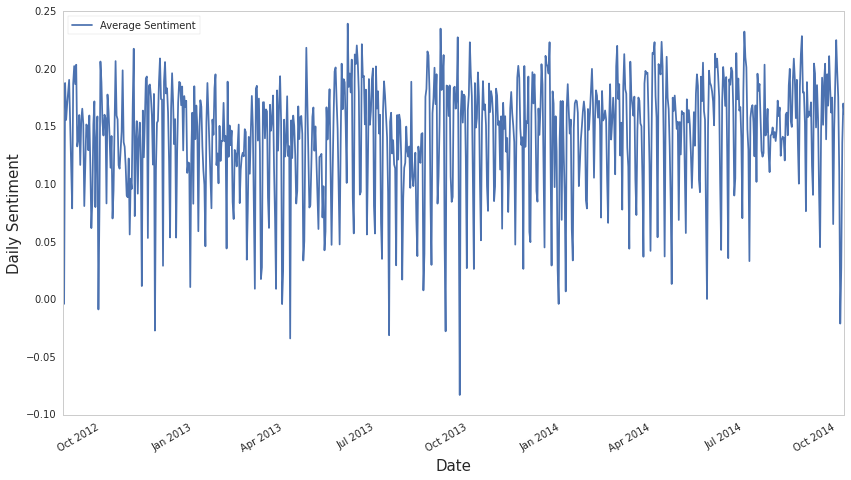

In [19]:
import matplotlib.pyplot as plt
df_daily_sentiment.plot(x='asof_date', y='average_sentiment', label = 'Average Sentiment')
plt.ylabel("Daily Sentiment", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.grid(b=None, which=u'major', axis=u'both')

That's a little noisy. So let's do a rolling average:

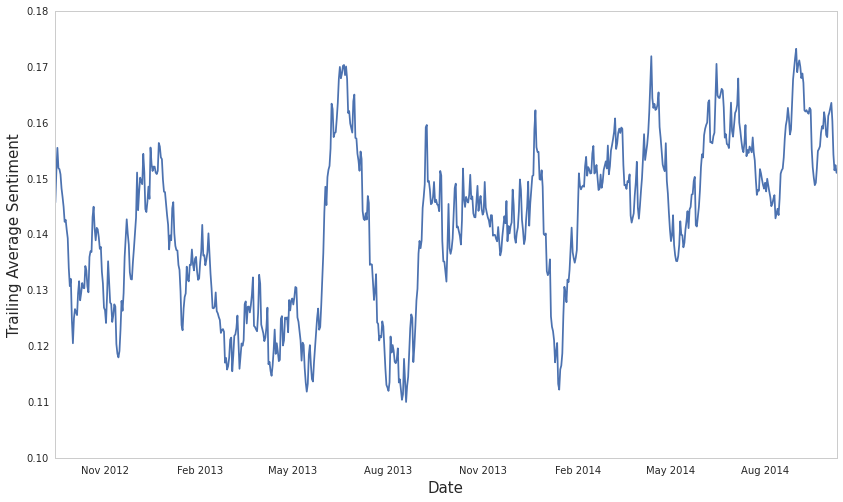

In [20]:
plt.plot(
    df_daily_sentiment.asof_date,
    pd.rolling_mean(df_daily_sentiment.average_sentiment, 20)
)

plt.ylabel("Trailing Average Sentiment",fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.grid(b=None, which=u'major', axis=u'both')

### Joins in Blaze

Another interesting feature with Blaze that emphasizes the value of the Quantopian Store is the `join()` function.

With `join()` we can link together two disparate data sets from different data vendors. Because they're both hosted on Quantopian and we've mapped the symbols to sids for you, you can combine different data sets from different vendors in just a few lines of code.

In this case, we'll grab some event data from EventVestor. Specifically this data is a set full of stock index changes (i.e. when a stock is added or removed from the S&P500, for example):

In [21]:
from quantopian.interactive.data.eventvestor import index_changes_free

We'll filter down these sets and then join them based on `as_ofdate` and the `sid`, which results in a new blaze expression which has both the index changes (from EventVestor) and the news sentiment (from Accern) for the security on that particular day. 

In [22]:
index_adds = index_changes_free[index_changes_free.change_type == 'Addition']
index_adds_sentiment = bz.join(index_adds, alphaone_free, ['sid', 'asof_date'])
joined_data = index_adds_sentiment[['sid', 'asof_date', 'index_name', 'event_headline', 'article_sentiment']]
joined_data[joined_data.article_sentiment != 0]

,sid,asof_date,index_name,event_headline,article_sentiment
0,27035,2012-09-25,S&P 400,Alpha Natural Resources to be Added in S&P Mid...,0.500
1,15139,2012-09-25,S&P 400,Genesee & Wyoming to be Added in S&P MidCap 40...,1.000
2,22316,2012-12-05,S&P 500,Garmin to be Added in S&P 500 Index,0.333
3,2248,2012-12-05,S&P 400,R.R. Donnelly & Sons to be Added in S&P MidCap...,0.833
4,32622,2013-02-07,S&P 400,CommVault Systems to be Added to S&P MidCap 40...,-0.333
5,6257,2013-02-07,S&P 500,PVH Corp. to be Added to S&P 500 Index,1.000
6,28378,2013-02-21,S&P 600,Atlas Air Worldwide Holdings to be Added in S&...,0.500
7,12959,2013-05-03,S&P 400,3D Systems Corp. to be Added in S&P MidCap 400...,0.250
8,40146,2013-05-03,S&P 600,CoreSite Realty Corp. to be Added in S&P Small...,1.000
9,4315,2013-05-16,S&P 500,Kansas City Southern to be Added in S&P 500 Index,1.000


For full Blaze docs: http://blaze.readthedocs.org/en/latest/index.html
The "Pandas to Blaze" and "SQL to Blaze" rosetta stones are useful.